In [1]:
import pandas as pd
import numpy as np
import random
import plotly as px
import plotly_express as go

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

color_pal = sns.color_palette("husl", 9)
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
df = pd.read_excel('PQDataSubstations.xlsx')
df

,Time [UTC],U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
0,2022-07-21 15:40:00,75.65,76.29,76.19
1,2022-07-21 15:45:00,75.47,76.13,76.02
2,2022-07-21 15:50:00,75.76,76.40,76.28
3,2022-07-21 15:55:00,75.71,76.34,76.22
4,2022-07-21 16:00:00,75.73,76.37,76.25
...,...,...,...,...
17275,2022-09-19 15:15:00,74.89,75.62,75.41
17276,2022-09-19 15:20:00,74.45,75.17,74.97
17277,2022-09-19 15:25:00,75.57,76.24,76.05
17278,2022-09-19 15:30:00,75.57,76.25,76.05


In [3]:
df.columns

Index(['Time [UTC]', 'U1(Avg) [kV]', 'U2(Avg) [kV]', 'U3(Avg) [kV]'], dtype='object')

In [4]:
df.describe()

,U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
count,17280.000000,17280.000000,17280.000000
mean,73.878948,74.560423,74.468377
std,5.648724,5.699342,5.685773
min,0.040000,0.000000,0.000000
25%,73.260000,73.950000,73.870000
50%,74.300000,74.990000,74.900000
75%,75.290000,75.980000,75.870000
max,81.910000,82.700000,82.050000


In [5]:
df.tail()

,Time [UTC],U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
17275,2022-09-19 15:15:00,74.89,75.62,75.41
17276,2022-09-19 15:20:00,74.45,75.17,74.97
17277,2022-09-19 15:25:00,75.57,76.24,76.05
17278,2022-09-19 15:30:00,75.57,76.25,76.05
17279,2022-09-19 15:35:00,75.30,75.99,75.80


In [6]:
dfr = pd.read_csv("RabaiSub.csv")
dfr

,Datetime,AvgKv1,AvgKv2,AvgKv3
0,7/21/2022 12:35,74.49,74.55,74.51
1,7/21/2022 12:40,74.73,74.82,74.74
2,7/21/2022 12:45,74.96,75.04,74.97
3,7/21/2022 12:50,75.87,75.93,75.87
4,7/21/2022 12:55,75.32,75.39,75.35
...,...,...,...,...
17275,9/19/2022 12:11,77.90,78.86,77.95
17276,9/19/2022 12:16,78.04,78.97,78.06
17277,9/19/2022 12:21,78.39,79.33,78.40
17278,9/19/2022 12:26,77.42,78.36,77.44


In [7]:
dfr.describe()

,AvgKv1,AvgKv2,AvgKv3
count,17280.000000,17280.000000,17280.000000
mean,76.688218,77.185525,76.702061
std,1.306609,1.350671,1.291888
min,71.410000,71.560000,71.490000
25%,75.780000,76.260000,75.810000
50%,76.770000,77.260000,76.780000
75%,77.640000,78.150000,77.630000
max,82.410000,83.470000,82.440000


In [8]:
dfr

,Datetime,AvgKv1,AvgKv2,AvgKv3
0,7/21/2022 12:35,74.49,74.55,74.51
1,7/21/2022 12:40,74.73,74.82,74.74
2,7/21/2022 12:45,74.96,75.04,74.97
3,7/21/2022 12:50,75.87,75.93,75.87
4,7/21/2022 12:55,75.32,75.39,75.35
...,...,...,...,...
17275,9/19/2022 12:11,77.90,78.86,77.95
17276,9/19/2022 12:16,78.04,78.97,78.06
17277,9/19/2022 12:21,78.39,79.33,78.40
17278,9/19/2022 12:26,77.42,78.36,77.44


In [9]:

dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  17280 non-null  object 
 1   AvgKv1    17280 non-null  float64
 2   AvgKv2    17280 non-null  float64
 3   AvgKv3    17280 non-null  float64
dtypes: float64(3), object(1)
memory usage: 540.1+ KB


In [10]:
dfr = dfr.set_index('Datetime')
dfr.index = pd.to_datetime(dfr.index)

In [11]:
dfr.index

DatetimeIndex(['2022-07-21 12:35:00', '2022-07-21 12:40:00',
               '2022-07-21 12:45:00', '2022-07-21 12:50:00',
               '2022-07-21 12:55:00', '2022-07-21 13:00:00',
               '2022-07-21 13:05:00', '2022-07-21 13:10:00',
               '2022-07-21 13:15:00', '2022-07-21 13:20:00',
               ...
               '2022-09-19 11:46:00', '2022-09-19 11:51:00',
               '2022-09-19 11:56:00', '2022-09-19 12:01:00',
               '2022-09-19 12:06:00', '2022-09-19 12:11:00',
               '2022-09-19 12:16:00', '2022-09-19 12:21:00',
               '2022-09-19 12:26:00', '2022-09-19 12:31:00'],
              dtype='datetime64[ns]', name='Datetime', length=17280, freq=None)

In [12]:
dfr.drop(columns = ['AvgKv2', 'AvgKv3'], inplace=True)

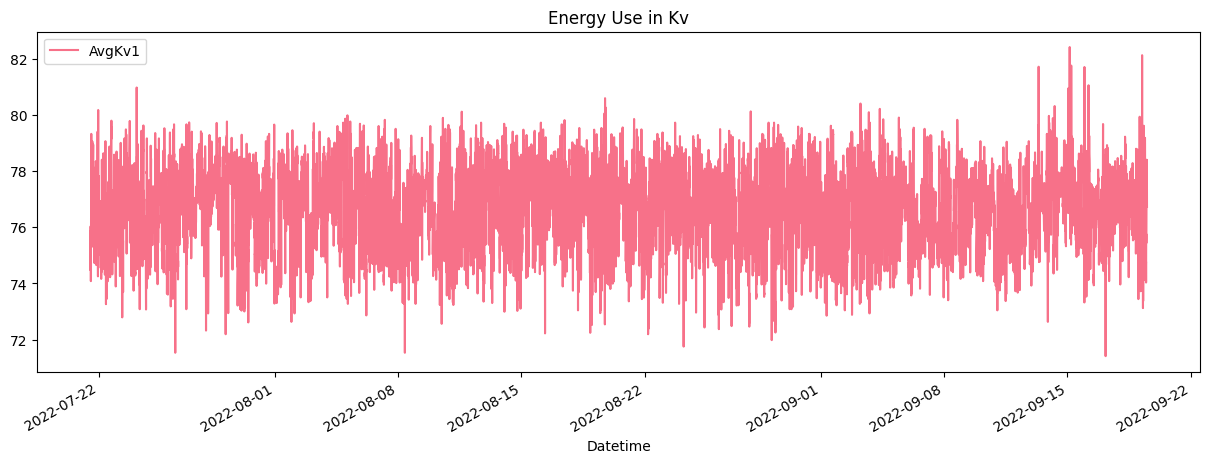

In [13]:
dfr.plot(kind='line',
        figsize=(15, 5),
        color=color_pal[0],
        title='Energy Use in Kv')
plt.show()

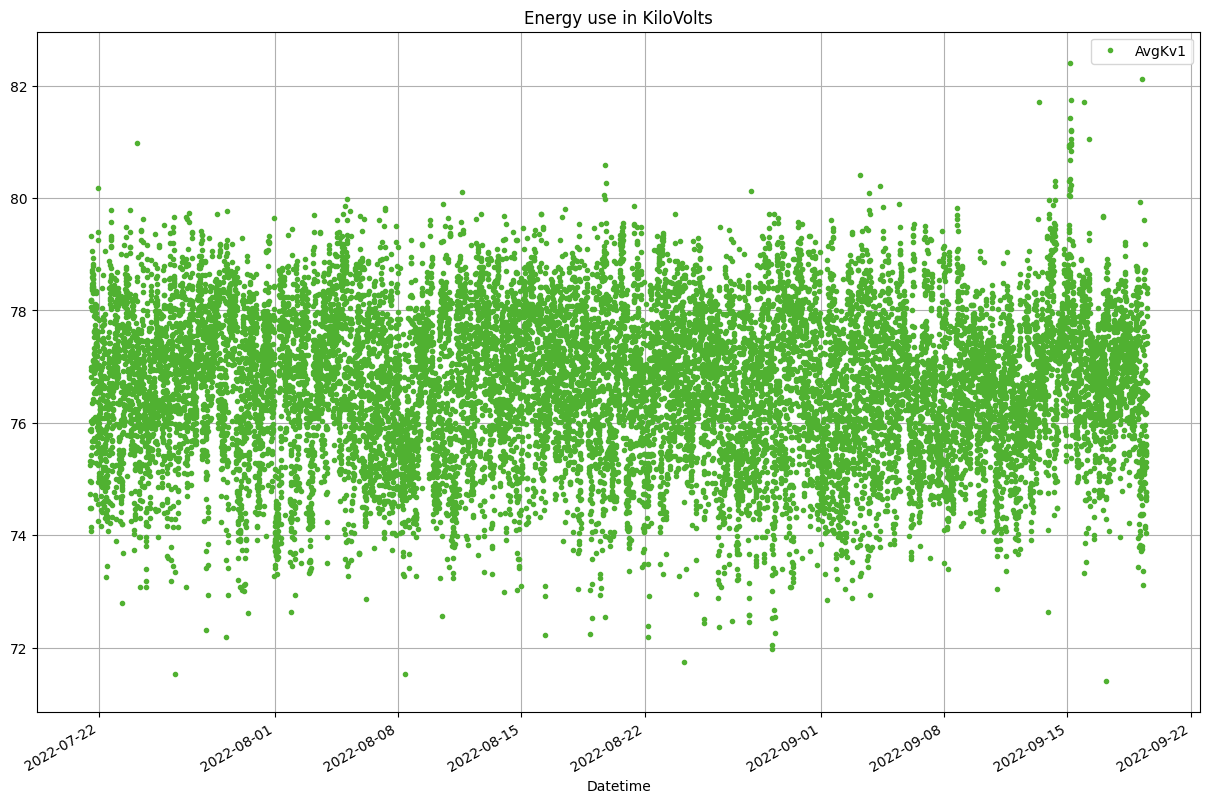

In [14]:
# Setting Datetime column as index
dfr.plot(style='.',figsize=(15,10),color=color_pal[3],title='Energy use in KiloVolts')
plt.grid()

# SPLITTING THE DATA INTO THE TRAIN AND TEST SET

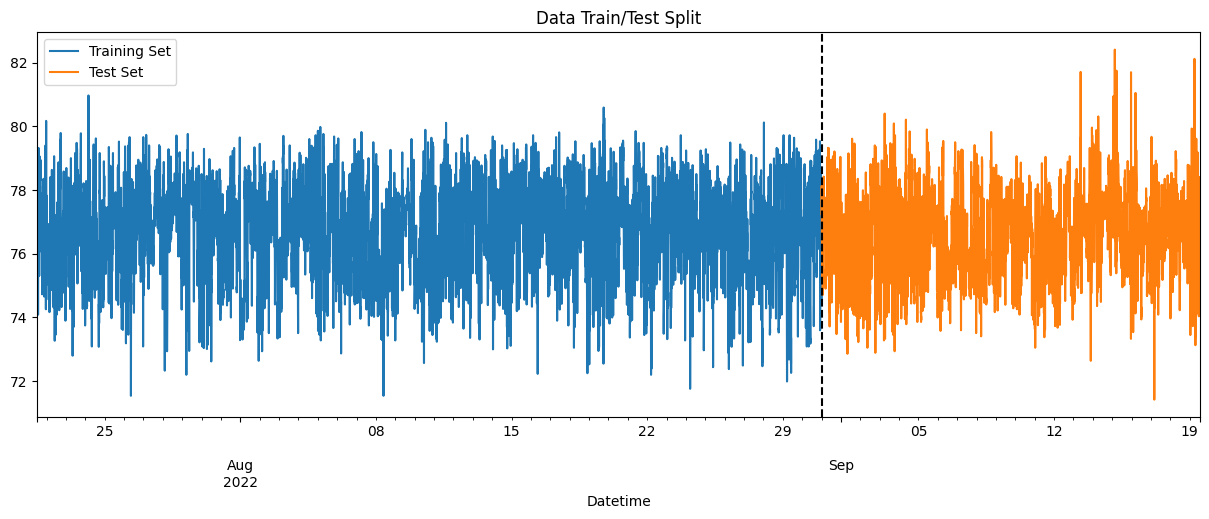

In [15]:
train = dfr.loc[dfr.index < '2022-08-31']
test = dfr.loc[dfr.index >= '2022-08-31']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax, label="Test Set")

ax.axvline('2022-08-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()          

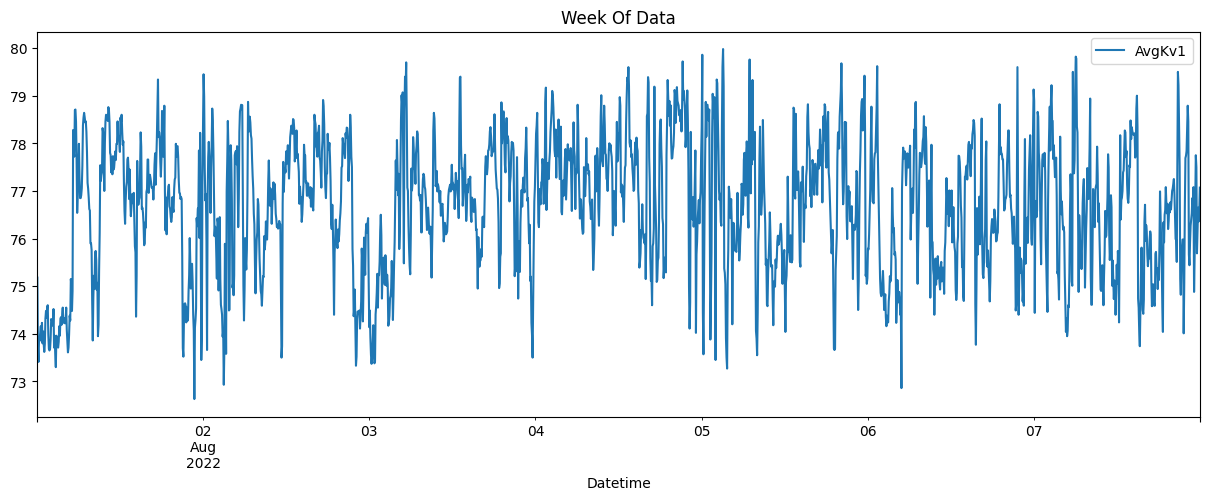

In [16]:
# Getting the Energy data consumed in a week

dfr.loc[(dfr.index > '2022-08-01') & (dfr.index < '2022-08-08')]  \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [17]:
def create_features(dfr):
    """
    Create time series features based on time series index.
    """
    dfr = dfr.copy()
    dfr['hour'] = dfr.index.hour
    dfr['dayofweek'] = dfr.index.dayofweek
    dfr['month'] = dfr.index.month
    dfr['year'] = dfr.index.year
    dfr['dayofyear'] = dfr.index.dayofyear
    dfr['dayofmonth'] = dfr.index.day
    dfr['weekofyear'] = dfr.index.isocalendar().week
    return dfr

df = create_features(dfr)
df.head()

,AvgKv1,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2022-07-21 12:35:00,74.49,12,3,7,2022,202,21,29
2022-07-21 12:40:00,74.73,12,3,7,2022,202,21,29
2022-07-21 12:45:00,74.96,12,3,7,2022,202,21,29
2022-07-21 12:50:00,75.87,12,3,7,2022,202,21,29
2022-07-21 12:55:00,75.32,12,3,7,2022,202,21,29


# Create our Model

In [19]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'month', 'year']
TARGET = 'AvgKv1'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [22]:
print(X_train.shape)
print(y_train.shape)


(11657, 5)
(11657,)


# Model Creation

In [26]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [32]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.003499316223728677


In [35]:
y_pred = regr.predict(X_test) 
print("Predictions of Average Energy Consumed :", y_pred)

Predictions of Average Energy Consumed : [76.55318649 76.55318649 76.55318649 ... 76.72504198 76.72504198
 76.72504198]


In [36]:
# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2494901816902495

- One way to evaluate the Linear Regression model would be to use the train_test_split function to  use cross-validation feature. The method randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Regression  model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train ,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.25779076 1.27292812 1.38560735 1.34879353 1.33278463 1.36269954
 1.23082399 1.39918085 1.25612144 1.49175681]
Mean: 1.333848702193731
Standard deviation: 0.0768705497361228


In [24]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[19:27:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:75.46355	validation_1-rmse:75.38336
[100]	validation_0-rmse:27.65228	validation_1-rmse:27.56980
[200]	validation_0-rmse:10.19664	validation_1-rmse:10.11297
[300]	validation_0-rmse:3.91976	validation_1-rmse:3.88995
[400]	validation_0-rmse:1.85467	validation_1-rmse:1.81693
[500]	validation_0-rmse:1.34700	validation_1-rmse:1.33988
[600]	validation_0-rmse:1.25543	validation_1-rmse:1.28127
[680]	validation_0-rmse:1.23821	validation_1-rmse:1.28280


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)



# Importance Features

- Basically we will see with the below code which features is most important to our model and it had been using most .


In [46]:
fea = pd.DataFrame(data=reg.feature_importances_,index=reg.get_booster().feature_names,columns=['Importance'])
fea

,Importance
dayofyear,0.362611
hour,0.303699
dayofweek,0.333690
month,0.000000
year,0.000000


<Axes: title={'center': 'Feature Importance'}>

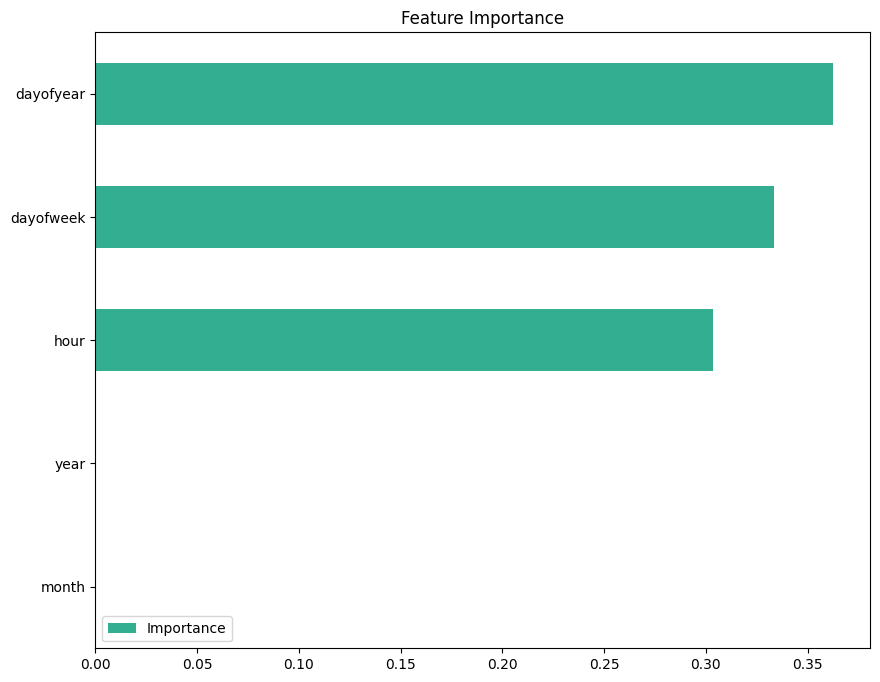

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
fea.sort_values('Importance').plot(kind='barh',color=color_pal[4],title='Feature Importance',ax=ax)

# Forecast on Test

In [61]:
test['Prediction'] = reg.predict(X_test)
df = dfr.merge(test['Prediction'], how='left',left_index=True,right_index=True)
df

,AvgKv1,Prediction
Datetime,,
2022-07-21 12:35:00,74.49,NaN
2022-07-21 12:40:00,74.73,NaN
2022-07-21 12:45:00,74.96,NaN
2022-07-21 12:50:00,75.87,NaN
2022-07-21 12:55:00,75.32,NaN
...,...,...
2022-09-19 12:11:00,77.90,77.131256
2022-09-19 12:16:00,78.04,77.131256
2022-09-19 12:21:00,78.39,77.131256


In [62]:
df.isnull().sum()

AvgKv1            0
Prediction    11657
dtype: int64

Text(0.5, 1.0, 'Raw Data and Prediction')

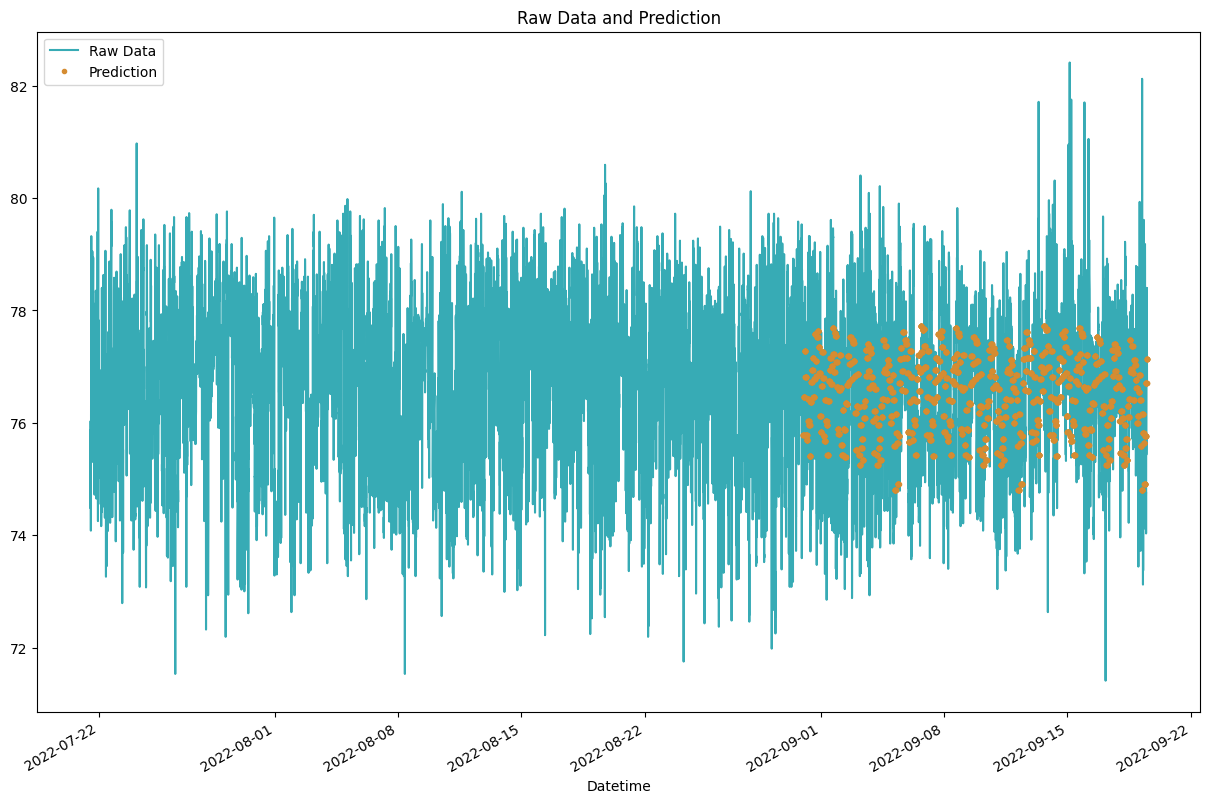

In [63]:
ax = df['AvgKv1'].plot(figsize=(15,10),color=color_pal[5])
df['Prediction'].plot(ax=ax, style='.',color=color_pal[1])
plt.legend(['Raw Data','Prediction'])
ax.set_title('Raw Data and Prediction')


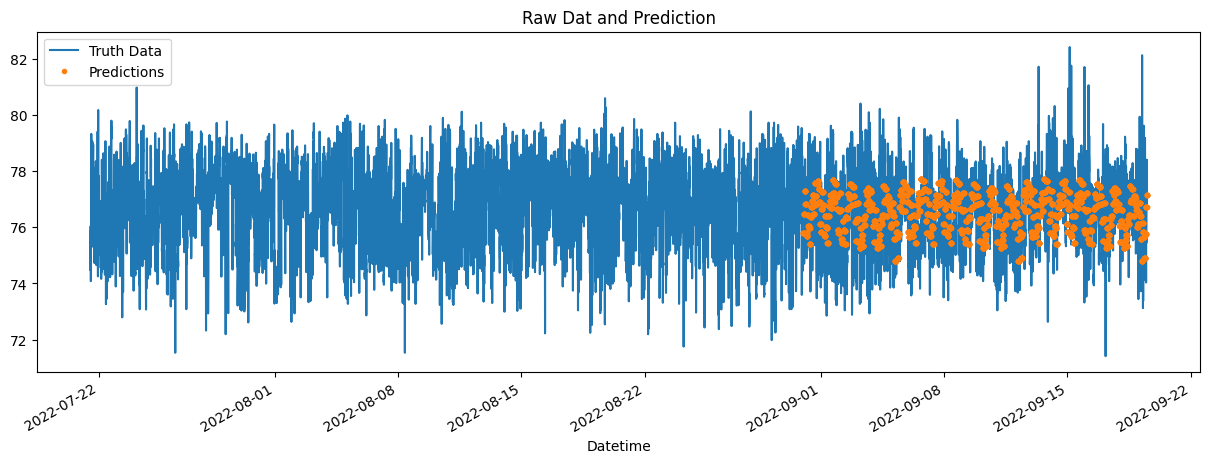

In [49]:
test['prediction'] = reg.predict(X_test)
df = dfr.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfr[['AvgKv1']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

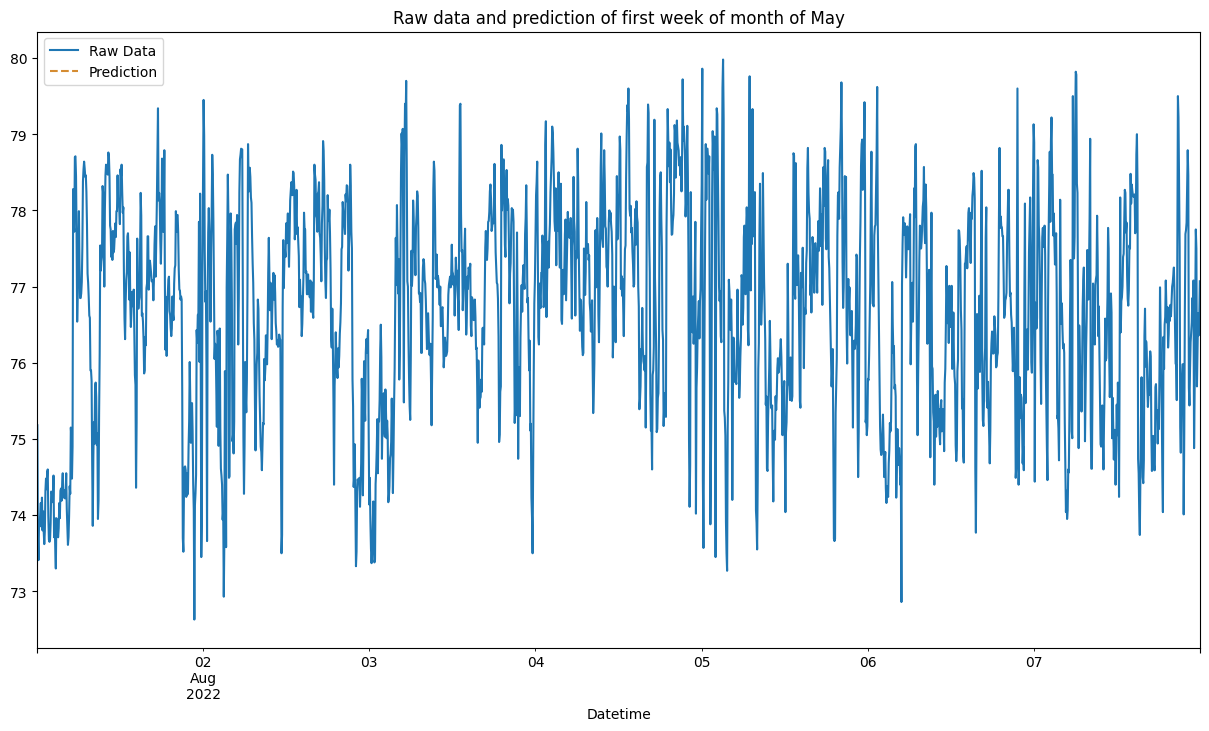

In [64]:
ax = df.loc[(df.index > '2022-08-01') & (df.index < '2022-08-08')]['AvgKv1'].plot(figsize=(15,8))
df.loc[(df.index > '2022-08-01') & (df.index < '2022-08-08')]['Prediction'].plot(ax=ax,style='--',color=color_pal[1])
ax.set_title('Raw data and prediction of first week of month of May')
plt.legend(['Raw Data','Prediction'])

In [54]:
score = np.sqrt(mean_squared_error(test['AvgKv1'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')


RMSE Score on Test set: 1.34


In [55]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)


date
2022-09-15    1.336905
2022-09-19    1.315192
2022-09-06    1.255284
2022-09-01    1.192670
2022-09-03    1.177018
2022-09-07    1.170647
2022-09-02    1.152167
2022-09-08    1.128702
2022-08-31    1.076484
2022-09-18    1.067857
Name: error, dtype: float64